In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [15]:
crm_path="../database/remap2022/remap2022_crm_macs2_hg19_v1_0.bed"
gene_path="../database/RefSeq/RefSeq.WholeGene.bed"

In [16]:
gene_df=pd.read_csv(gene_path,sep='\t', header=None)
gene_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,66999638,67216822,NM_032291,0,+,67000041,67208778,0,25,"413,64,25,72,57,55,176,12,12,25,52,86,93,75,50...","0,91891,99114,101988,105821,108854,109588,1265..."
1,chr1,66999251,67216822,NM_001308203,0,+,67000041,67208778,0,22,"104,123,64,25,57,55,176,25,52,86,93,75,128,127...","0,677,92278,99501,106208,109241,109975,137426,..."
2,chr1,33547778,33586132,NM_001301825,0,+,33547850,33585783,0,9,"177,174,173,135,166,163,173,215,488,","0,1776,9872,11104,12370,14529,15829,35724,37866,"
3,chr1,8378144,8404227,NM_001080397,0,+,8378168,8404073,0,9,"102,421,93,225,728,154,177,206,421,","0,6221,7213,7733,12124,17352,19731,21408,25662,"
4,chr1,16767166,16786584,NM_001145278,0,+,16767256,16785385,0,8,"104,101,105,82,109,178,76,1248,","0,2960,7198,7388,8421,11166,15146,18170,"


In [17]:
len(gene_df)

54959

In [11]:
crm_df=pd.read_csv(crm_path, sep='\t', header=None, names=["chr", "start", "end", "name","score", "strand", "thickStart", "thickEnd", "itemRgb"])
crm_df.head()

,chr,start,end,name,score,strand,thickStart,thickEnd,itemRgb
0,chr1,91439,91569,CTCF,2,.,91530,91530,"44,160,44"
1,chr1,136030,136267,ESR1,2,.,136244,136244,"148,103,189"
2,chr1,136453,137131,"NCOR1,HDAC1,MTA3,L3MBTL2,DPF2,ZBTB33,HES1,HDGF...",33,.,136756,136768,"227,119,194"
3,chr1,138905,139169,CTCF,5,.,139039,139039,"127,127,127"
4,chr1,237714,237888,"SMAD1,ZBTB2,CTCF,RAD21,SMC3,STAG1",84,.,237776,237795,"44,160,44"


<Axes: ylabel='score'>

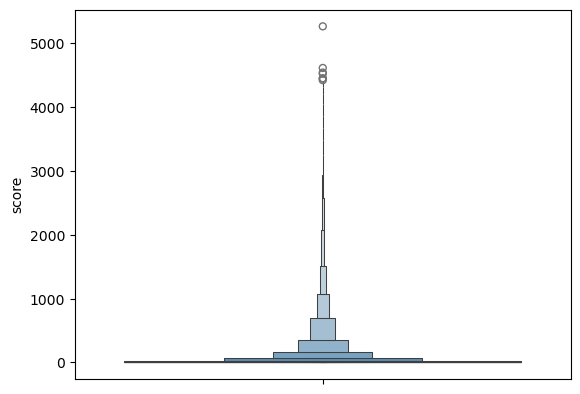

In [27]:
sns.boxenplot(crm_df["score"])

In [12]:
import pandas as pd

# Assuming 'crm_df' is your DataFrame and it contains columns: 'chr', 'start', 'end'

# Sort the DataFrame by chromosome (chr) and start position first to ensure correct comparison
crm_df_sorted = crm_df.sort_values(by=['chr', 'start'])

# Group by chromosome
grouped = crm_df_sorted.groupby('chr')

# Initialize an empty list to hold the results
overlaps = []

# Iterate through each group (chromosome)
for chromosome, group in grouped:
    # Iterate through the rows of the group
    for i in range(len(group) - 1):
        # Compare the 'end' of the current row to the 'start' of the next row
        if group.iloc[i]['end'] > group.iloc[i + 1]['start']:
            # If there is an overlap, append the information to the 'overlaps' list
            overlaps.append((chromosome, group.iloc[i]['start'], group.iloc[i]['end'], group.iloc[i + 1]['start'], group.iloc[i + 1]['end']))

# Convert the overlaps list to a DataFrame for easier viewing
overlaps_df = pd.DataFrame(overlaps, columns=['chr', 'Current_Start', 'Current_End', 'Next_Start', 'Next_End'])

# Print the overlaps DataFrame
print(overlaps_df)


               chr  Current_Start  Current_End  Next_Start  Next_End
0             chr1       17025860     17026432    17026204  17026293
1             chr1       17034273     17034572    17034486  17034842
2             chr1       17036169     17036535    17036276  17036599
3             chr1       17037267     17037472    17037271  17037532
4             chr1       17038695     17038989    17038897  17039261
..             ...            ...          ...         ...       ...
56  chrUn_gl000220         138036       138494      138314    138479
57  chrUn_gl000220         138314       138479      138345    138512
58  chrUn_gl000220         138345       138512      138350    138528
59  chrUn_gl000228         117850       118108      118023    118695
60            chrY       13140812     13141293    13140826  13141193

[61 rows x 5 columns]


In [13]:
# Filter the DataFrame for rows where 'strand' is not '.'
non_dot_strands = crm_df[~crm_df['strand'].isin(['.'])]

# Check if the filtered DataFrame is empty
if not non_dot_strands.empty:
    print("There are entries in the 'strand' column other than '.'")
else:
    print("All entries in the 'strand' column are '.'")

All entries in the 'strand' column are '.'


In [14]:
len(crm_df)

3448721

In [28]:
pd.set_option('display.max_colwidth', None)  # or some large value instead of None
print(crm_df['name'])


0                                                                                                                                                                  CTCF
1                                                                                                                                                                  ESR1
2          NCOR1,HDAC1,MTA3,L3MBTL2,DPF2,ZBTB33,HES1,HDGF,ATF3,CTBP1,SMARCA5,BRD9,ZNF639,EGR1,NFIC,HDAC2,SKIL,MAF1,SMARCE1,NR2C1,ESR1,ARID1B,TRIM24,ZBTB40,ZBTB2,ZNF592
3                                                                                                                                                                  CTCF
4                                                                                                                                     SMAD1,ZBTB2,CTCF,RAD21,SMC3,STAG1
                                                                                       ...                                                                      

In [29]:
# Split the 'name' column into lists of names, assuming comma separation
split_names = crm_df['name'].str.split(',')

# Flatten the list of lists into a single list of names
flat_list = [name for sublist in split_names for name in sublist]

# Convert to a pandas Series and then get unique values
unique_names = pd.Series(flat_list).unique()

# If you want to sort the names alphabetically
sorted_unique_names = np.sort(unique_names)

# Display the unique names
for name in sorted_unique_names:
    print(name)

AATF
ADNP
AEBP2
AFF1
AFF4
AGO1
AHR
AHRR
APC
AR
ARHGAP35
ARID1A
ARID1B
ARID2
ARID3A
ARID3B
ARID4A
ARID4B
ARID5B
ARNT
ARNTL
ARRB1
ASCL1
ASH1L
ASH2L
ASXL1
ASXL3
ATF1
ATF2
ATF3
ATF4
ATF7
ATM
ATOH8
ATRX
ATXN7L3
BACH1
BACH2
BAF155
BAHD1
BAP1
BATF
BATF3
BCL11A
BCL11B
BCL3
BCL6
BCL6B
BCLAF1
BCOR
BDP1
BHLHE22
BHLHE40
BICRA
BMI1
BMPR1A
BNC2
BPTF
BRCA1
BRD1
BRD2
BRD3
BRD4
BRD7
BRD9
BRF1
BRF2
C17orf49
CARM1
CASZ1
CBFA2T2
CBFA2T3
CBFB
CBX1
CBX2
CBX3
CBX4
CBX5
CBX7
CBX8
CC2D1A
CCAR2
CCNT2
CD74
CDC5L
CDK2
CDK6
CDK7
CDK8
CDK9
CDK9-HEXIM1
CDKN1B
CDX2
CEBPA
CEBPB
CEBPD
CEBPG
CEBPZ
CERS6
CHAF1B
CHAMP1
CHD1
CHD2
CHD4
CHD7
CHD8
CIITA
CLOCK
COBLL1
CREB1
CREB3
CREB3L1
CREB5
CREBBP
CREM
CRX
CRY1
CRY2
CSDC2
CSNK2A1
CTBP1
CTBP2
CTCF
CTCFL
CTNNB1
CUX1
CXXC4
CXXC5
DACH1
DAXX
DDX20
DDX21
DDX5
DEAF1
DEK
DIDO1
DLX4
DLX6
DMAP1
DNMT1
DNMT3B
DPF1
DPF2
DR1
DRAP1
DUX4
E2F1
E2F3
E2F4
E2F5
E2F6
E2F7
E2F8
E4F1
EBF1
EBF3
EED
EGR1
EHF
EHMT2
ELF1
ELF2
ELF3
ELF4
ELF5
ELK1
ELK4
ELL
ELL2
EOMES
EP300
EP400
EPAS1
ERF
ERG
ESR1
ESR2


In [30]:
len(sorted_unique_names)

1211

In [32]:
[item for item in sorted_unique_names if "H3" in item]


['NOTCH3', 'NR1H3']

In [33]:
# Check if there are any entries that start with 'H3'
contains_h3 = crm_df['name'].str.startswith('H3').any()

if not contains_h3:
    print("There is no information about histone modifications starting with 'H3' in the 'name' column.")
else:
    print("There are entries about histone modifications starting with 'H3' in the 'name' column.")

There is no information about histone modifications starting with 'H3' in the 'name' column.
